In [8]:
#Q1

# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Fetch the dataset from the provided URL.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Assign url to a variable called users.
users = pd.read_csv(url, delimiter='|')

# Step 4: Discover what is the mean age per occupation.
mean_age_occupation = users.groupby('occupation')['age'].mean()

# Step 5: Discover the Male ratio per occupation and sort it from the most to the least
def male_ratio(group):
    male_count = (group['gender'] == 'M').sum()
    total_count = len(group)
    return male_count / total_count

male_ratio_occupation = users.groupby('occupation').apply(male_ratio)
male_ratio_occupation = male_ratio_occupation.sort_values(ascending=False)

# Step 6: For each occupation, calculate the minimum and maximum ages
age_range_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7: For each combination of occupation and sex, calculate the mean age
average_age_combination = users.groupby(['occupation', 'gender'])['age'].mean()

# Step 8: For each occupation present the percentage of women and men
def calculate_gender_percentage(group):
    total_count = len(group)
    female_count = (group['gender'] == 'F').sum()
    male_count = total_count - female_count
    return {
        'percentage_female': (female_count / total_count) * 100,
        'percentage_male': (male_count / total_count) * 100
    }

gender_percentage_occupation = users.groupby('occupation').apply(calculate_gender_percentage)

# Print or display the results for each calculated metric
print("\n Average Age of Occupation:\n", mean_age_occupation)
print("\n Male Ratio of Occupation (sorted):\n", male_ratio_occupation)
print("\n Age Range of Occupation:\n", age_range_occupation)
print("\n Average Age of Occupation and Gender:\n", average_age_combination)
print("\n Gender Percentage of Occupation:\n", gender_percentage_occupation)



 Average Age of Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

 Male Ratio of Occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other

In [13]:
#Q2

# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

#Step 3: Assign it to a variable called euro12
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goals_column = euro12['Goals']

# Step 5: How many team participated in the Euro2012?
num_of_teams = euro12.shape[0]

# Step 6: What is the number of columns in the dataset?
num_of_columns = euro12.shape[1]

# Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
fouls = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8: Sort the teams by Red Cards, then to Yellow Cards
fouls_sorted = fouls.sort_values(by=['Red Cards', 'Yellow Cards'])

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = fouls['Yellow Cards'].mean()

# Step 10: Filter teams that scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6]

# Step 11. Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]

# Step 13: Select all columns except the last 3
columns_except_last_3 = euro12.iloc[:, :-3]

# Step 14: Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

# Print the results
print("Number of participating teams in Euro 2012:", num_of_teams)
print("Number of columns in the dataset:", num_of_columns)
print("Mean number of Yellow Cards per team:", mean_yellow_cards_per_team)
print("\nTeams that scored more than 6 goals:\n", high_scoring_teams)
print("\nTeams whose names start with 'G':\n", teams_starting_with_G)
print("\nFirst 7 columns of the dataset:\n", first_7_columns)
print("\nColumns except the last 3 columns:\n", columns_except_last_3)
print("\nShooting Accuracy of England, Italy, and Russia:\n", shooting_accuracy_selected_teams)

Number of participating teams in Euro 2012: 16
Number of columns in the dataset: 35
Mean number of Yellow Cards per team: 7.4375

Teams that scored more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0   

In [16]:
#Q3

# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create 3 differents Series, each of length 100, as follows:The first a random number from 1 to 4,The second a random number from 1 to 3, The third a random number from 10,000 to 30,000
s1 = pd.Series(np.random.randint(1, 2, size=100))
s2 = pd.Series(np.random.randint(1, 3, size=100))
s3 = pd.Series(np.random.randint(10000, 29000, size=100))

# Step 3: Create a DataFrame by joinning the Series by column
data = {'bedrs': s1, 'bathrs': s2, 'price_sqr_meter': s3}
df = pd.DataFrame(data)

# Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([s1, s2, s3], ignore_index=True))

# Step 6
print(bigcolumn.index.max() == 299)  # This will print True if the index goes up to 299.

# Step 7
df = df.reindex(range(300))

# Print the first few rows of the DataFrame
print(df.head())

True
   bedrs  bathrs  price_sqr_meter
0    1.0     1.0          10879.0
1    1.0     2.0          11565.0
2    1.0     1.0          11408.0
3    1.0     1.0          13833.0
4    1.0     1.0          22303.0


In [21]:
#Q4

# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset from the attached file wind.txt
data = pd.read_csv('C:\\Users\\user\\Downloads\\BDAT\\BDAT 1004\\Assignment\\Problem set 3\\Wind Statistics.txt', delim_whitespace=True, parse_dates=[[0, 1, 2]])

#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data.set_index('Yr_Mo_Dy', inplace=True)

# Step 4: Create a function to fix Year 2061 and apply it.
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: pd.Timestamp(fix_year(x.year), x.month, x.day))

#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.index = pd.to_datetime(data.index)
  
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
missing_values_location = data.isnull().sum()

# Step 7. Compute how many non-missing values there are in total.
total_non_missing_values = data.notnull().sum().sum()

# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
average_windspeed_total = data.mean().mean()

# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

# Step 11. Find the average windspeed in January for each location
yearly_data = data.resample('Y').mean()

monthly_data = data.resample('M').mean()

# Step 12: Resample to weekly frequency and calculate min, max, mean, and std for the first 52 weeks
weekly_data = data.resample('W-MON').apply(lambda x: x.head(52).agg(['min', 'max', 'mean', 'std']))

# Print the results or perform further analysis as needed
print("Missing Values per Location:")
print(missing_values_location)
print("\nNon-Missing Values in Total:")
print(total_non_missing_values)
print("\nMean Windspeed over all Locations and Times:")
print(average_windspeed_total)
print("\nLocation Statistics:")
print(loc_stats)
print("\nDay Statistics:")
print(day_stats)
print("\nYearly Data:")
print(yearly_data)
print("\nMonthly Data:")
print(monthly_data)
print("\nWeekly Data (first 52 weeks):")
print(weekly_data)

Missing Values per Location:
RPT    0
VAL    1
ROS    0
KIL    0
SHA    1
BIR    0
DUB    0
CLA    1
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

Non-Missing Values in Total:
33

Mean Windspeed over all Locations and Times:
12.053333333333333

Location Statistics:
       min    max       mean       std
RPT  14.71  18.50  16.083333  2.099389
VAL  14.96  16.88  15.920000  1.357645
ROS  10.83  13.17  12.110000  1.185411
KIL   6.50  10.13   8.640000  1.900289
SHA  11.17  12.62  11.895000  1.025305
BIR   6.17   9.87   7.903333  1.861003
DUB  11.25  13.67  12.140000  1.330902
CLA  10.04  10.25  10.145000  0.148492
MUL   8.50  10.83   9.706667  1.167233
CLO   7.67  12.58   9.973333  2.469015
BEL  12.75  18.50  16.263333  3.080265
MAL  12.71  15.04  13.860000  1.165290

Day Statistics:
             min    max       mean       std
Yr_Mo_Dy                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  1

In [23]:
#Q5

#Step 1. Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

#step 3: Assign it to a variable called chipo.
chipo = pd.read_csv(url, sep='\t')
print (chipo)

# Step 4: See the first 10 entries
print(chipo.head(10))

# Step 5: What is the number of observations in the dataset?
num_observations_dataset = chipo.shape[0]
print("Number of observations:", num_observations_dataset)

# Step 6. What is the number of columns in the dataset?
num_columns_dataset = chipo.shape[1]
print("Number of columns:", num_columns_dataset)

# Step 7. Print the name of all the columns.
print("Columns:", chipo.columns)

# Step 8. How is the dataset indexed?
print("Index:", chipo.index)

# Step 9. Which was the most-ordered item?
most_ordered = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered)

# Step 10. For the most-ordered item, how many items were ordered?
count_most_ordered = chipo[chipo['item_name'] == most_ordered]['quantity'].sum()
print("Quantity ordered for most-ordered item:", count_most_ordered)

# Step 11. What was the most ordered item in the choice_description column?
most_ordered_item = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered choice description:", most_ordered_item)

# Step 12. How many items were orderd in total?
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

# Step 13 Turn the item price into a float, Check the item price type, Create a lambda function and change the type of item price, Check the item price type
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("Item price type after conversion:", chipo['item_price'].dtype)

# Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

# Step 15. How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

# Step 16. What is the average revenue amount per order?
mean_revenue_per_order = revenue / num_orders
print("Mean revenue per order:", mean_revenue_per_order)

# Step 17. How many different items are sold?
num_different_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items_sold)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

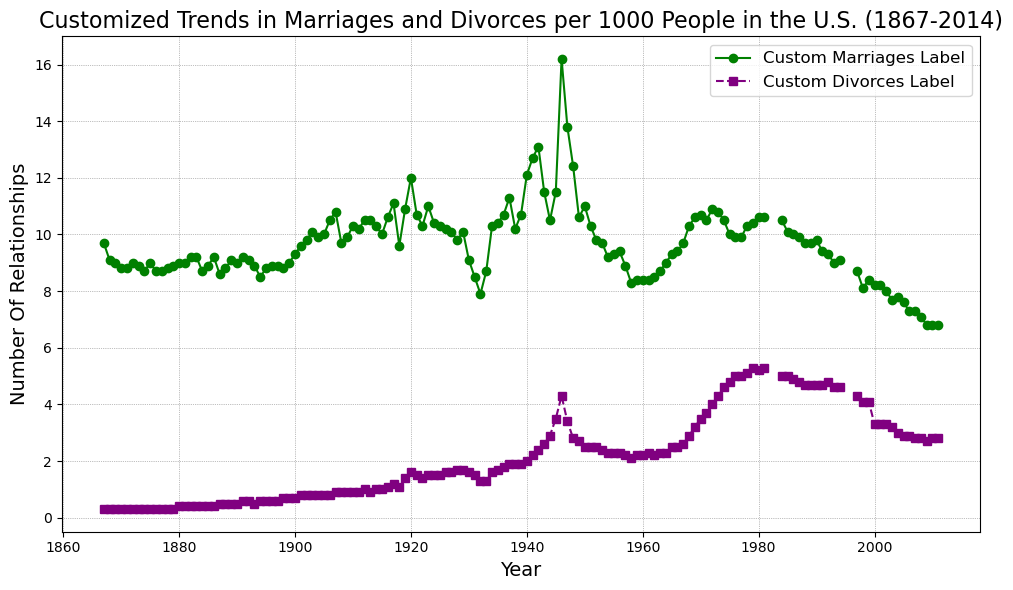

In [27]:
#Q6

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = "C:\\Users\\user\\Downloads\\BDAT\\BDAT 1004\\Assignment\\Problem set 3\\us-marriages-divorces-1867-2014.csv"
marriage_divorce = pd.read_csv(file_path)

# Extract relevant columns
years = marriage_divorce['Year']
marriages_per_1000 = marriage_divorce['Marriages_per_1000']
divorces_per_1000 = marriage_divorce['Divorces_per_1000']

# Create a line plot with custom style
plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_1000, label='Custom Marriages Label', color='green', marker='o')
plt.plot(years, divorces_per_1000, label='Custom Divorces Label', linestyle='dashed', color='purple', marker='s')

# Add labels and title with style
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number Of Relationships(per 1000)', fontsize=14)
plt.title('Relationships in the U.S. (1867-2014)', fontsize=16)

# Add legend with custom location
plt.legend(loc='upper right', fontsize=12)

# Customize grid appearance
plt.grid(color='gray', linestyle=':', linewidth=0.5)

# Adjust plot layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


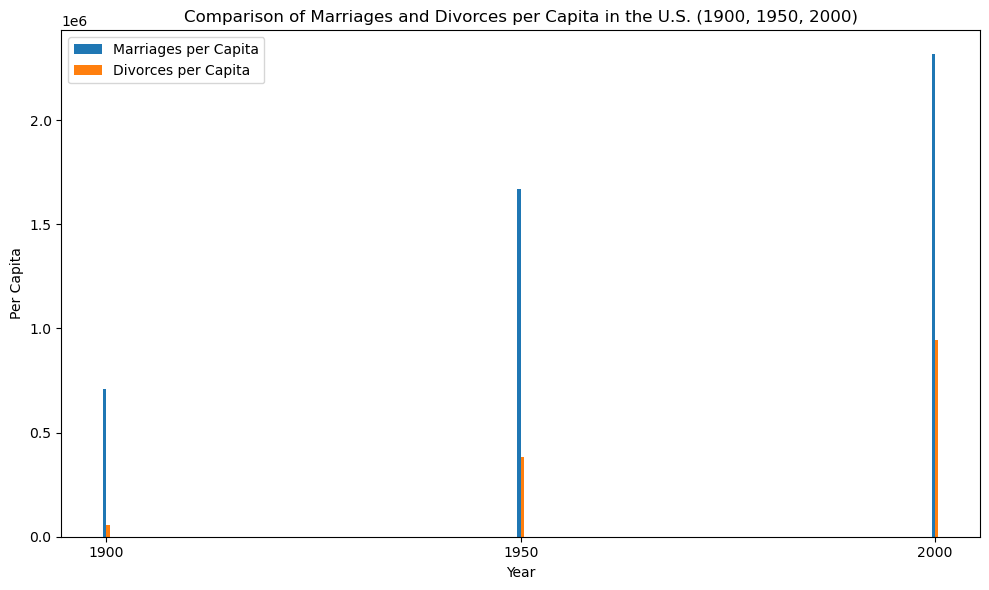

In [25]:
#Q7

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'marriage_and_divorce_data.csv' with your file's path)
data = pd.read_csv("C:\\Users\\user\\Downloads\\BDAT\\BDAT 1004\\Assignment\\Problem set 3\\us-marriages-divorces-1867-2014.csv")

# List of years for which you want to compare data
years_of_interest = [1900, 1950, 2000]

# Extract marriages and divorces data for the specified years
marriages_per_capita = data[data['Year'].isin(years_of_interest)]['Marriages']
divorces_per_capita = data[data['Year'].isin(years_of_interest)]['Divorces']

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(years_of_interest, marriages_per_capita, width=bar_width, label='Marriages per Capita')
plt.bar([year + bar_width for year in years_of_interest], divorces_per_capita, width=bar_width, label='Divorces per Capita')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks([year + bar_width / 2 for year in years_of_interest], years_of_interest)
plt.legend()

# Display the plot with adjusted layout
plt.tight_layout()

# Show the plot
plt.show()

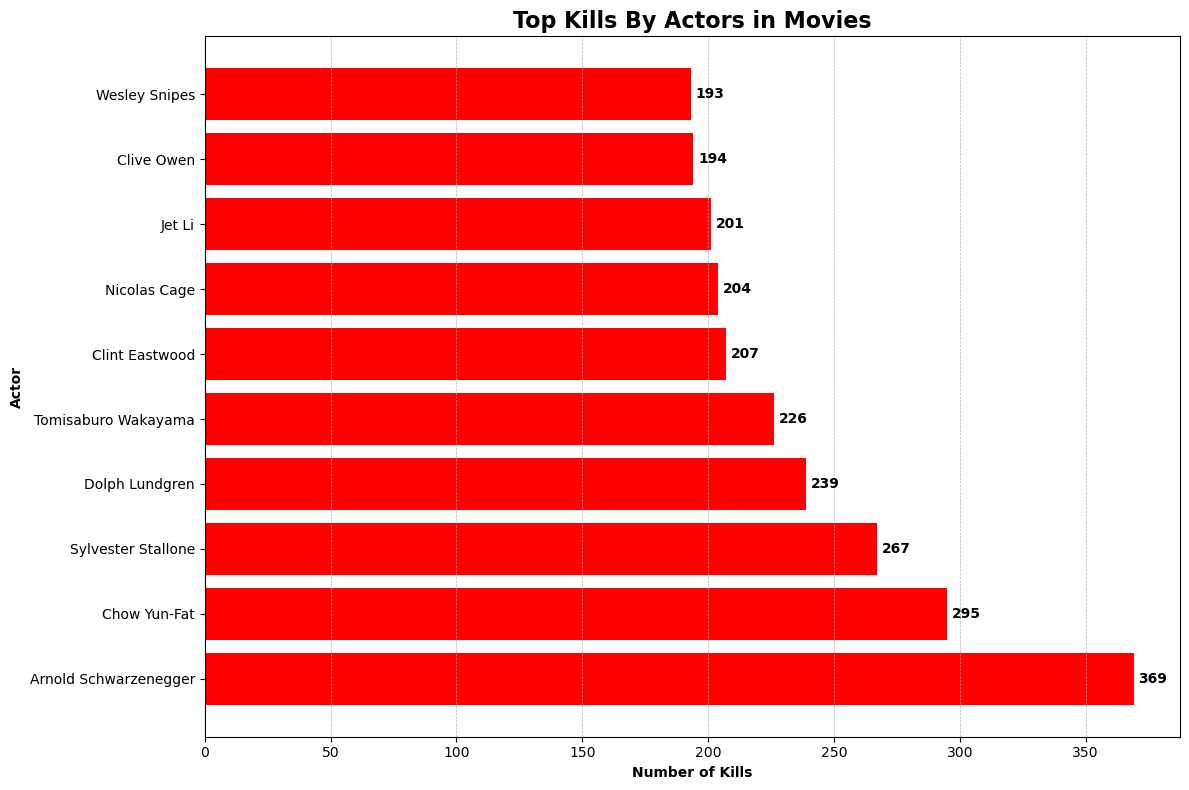

In [30]:
#Q8

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
file_path = "C:\\Users\\user\\Downloads\\BDAT\\BDAT 1004\\Assignment\\Problem set 3\\actor_kill_counts.csv"
actor_kill = pd.read_csv(file_path)

# Sort the data by kill count in descending order
sorted_actor_kill = actor_kill.sort_values(by='Count', ascending=False)

# Create a distinctive style for the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_actor_kill['Actor'], sorted_actor_kill['Count'], color='red')

# Add bold labels for axes, title, and grid
plt.xlabel('Number of Kills', fontweight='bold')
plt.ylabel('Actor', fontweight='bold')
plt.title('Top Kills By Actors in Movies', fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# Add a label for each bar with the actor's name and kill count
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center', fontweight='bold')

# Display the chart with an adjusted layout
plt.tight_layout()

# Show the plot
plt.show()

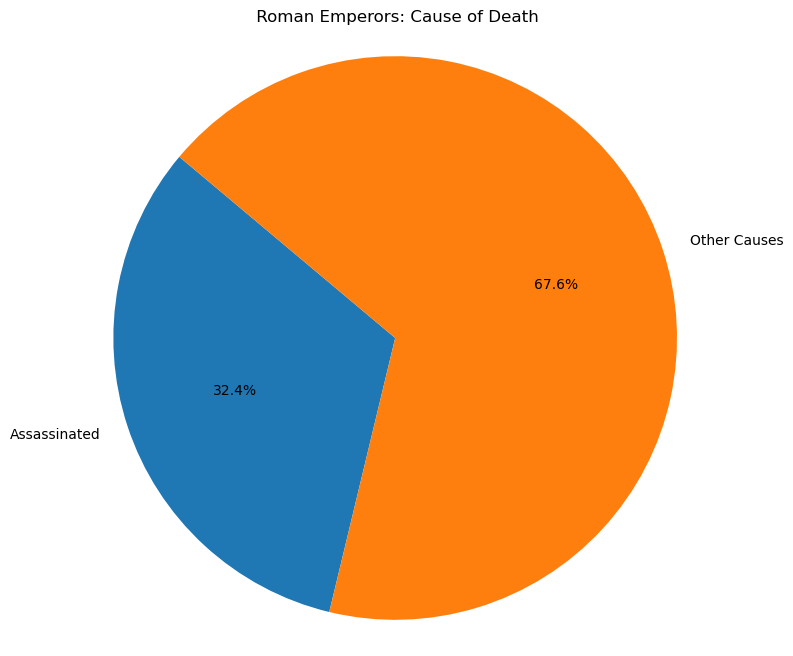

In [32]:
#Q9

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'roman_emperors.csv' with your file's path)
data = pd.read_csv("C:\\Users\\user\\Downloads\\BDAT\\BDAT 1004\\Assignment\\Problem set 3\\roman-emperor-reigns.csv")

# Count the number of emperors assassinated and those with other causes of death
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
other_causes_emperors = data.shape[0] - assassinated_emperors

# Create data for the pie chart
cause_labels = ['Assassinated', 'Other Causes']
cause_sizes = [assassinated_emperors, other_causes_emperors]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cause_sizes, labels=cause_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Add title
plt.title(' Roman Emperors: Cause of Death')

# Show the plot
plt.show()

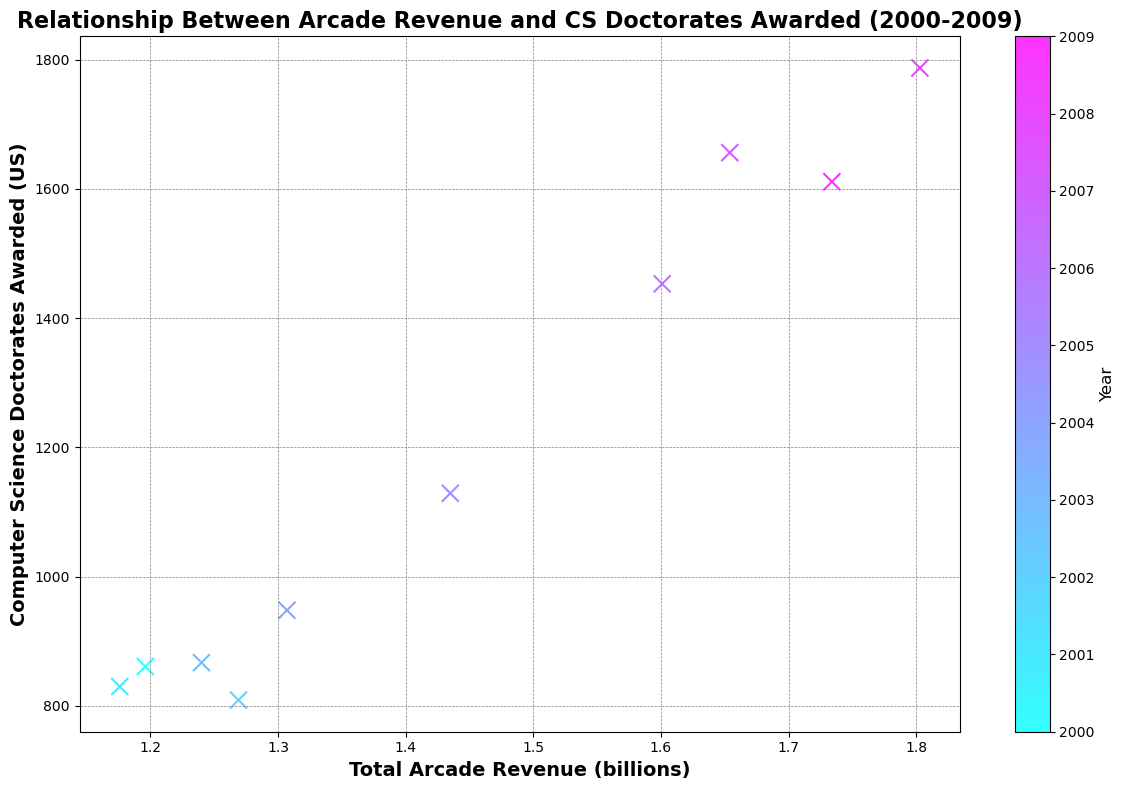

In [35]:
#Q10

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
file_path = "C:\\Users\\user\\Downloads\\BDAT\\BDAT 1004\\Assignment\\Problem set 3\\arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Extract the data
years = data["Year"]
arcade_revenue_billions = data["Total Arcade Revenue (billions)"]
cs_doctorates_awarded = data["Computer Science Doctorates Awarded (US)"]

# Create a scatter plot with a distinctive style
plt.figure(figsize=(12, 8))
plt.scatter(arcade_revenue_billions, cs_doctorates_awarded, c=years, cmap="cool", s=150, marker='x', alpha=0.8)

# Add labels and title with bold font
plt.xlabel("Total Arcade Revenue (billions)", fontsize=14, fontweight='bold')
plt.ylabel("Computer Science Doctorates Awarded (US)", fontsize=14, fontweight='bold')
plt.title("Relationship Between Arcade Revenue and CS Doctorates Awarded (2000-2009)", fontsize=16, fontweight='bold')

# Add a colorbar indicating the years
cbar = plt.colorbar()
cbar.set_label("Year", fontsize=12)

# Add grid lines with custom style
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adjust plot layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()